<a href="https://colab.research.google.com/github/Fawzy-AI-Explorer/Kaggle-Competitions/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1038]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

# **Read Data**

In [1039]:
train_data        = pd.read_csv ("/content/train.csv")
test_data         = pd.read_csv ("/content/test.csv")
sample_submission = pd.read_csv ("/content/sample_submission.csv" )

**save PassengerId to sumbition**

In [1040]:
PassengerId_test = pd.DataFrame(test_data["PassengerId"])
PassengerId_test.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


# **Some Info about Data**

In [1041]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1042]:
train_data.shape

(8693, 14)

In [1043]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [1044]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**We have 14 Columns -- > (7 object) (6 float) (1 bool)**                                
**there are many Nulls**                                                   
**All Data Types are correct**

In [1045]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**As wee see there are outliers in our Data set**                              
**in Age min is Zero !!!!!!!!!!!!!!!!!!**

In [1046]:
zero_Age_train = (train_data["Age"]==0).sum() # 178
train_data[train_data["Age"]==0].head()
# print(zero_Age_train)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,True
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,NaN,0.0,0.0,Stald Hewson,True
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,False


In [1047]:
zero_Age_test = (test_data["Age"]==0).sum() # 90
test_data[train_data["Age"]==0].head()

<ipython-input-1047-12378d826770>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data[train_data["Age"]==0].head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
19,0047_03,Europa,False,B/0/S,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN
61,0143_01,Europa,False,C/2/P,55 Cancri e,30.0,False,0.0,8853.0,6108.0,29.0,3523.0,Alaton Unloweedic
86,0187_01,Mars,True,F/38/S,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Ranuts Kidne
102,0228_03,Europa,True,B/4/S,55 Cancri e,42.0,False,0.0,0.0,0.0,0.0,0.0,Alurops Dompul
157,0339_05,Earth,True,G/56/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Davisy Colleruces


In [1048]:
#Drop Name column as it is not required

train_data.drop(columns=['Name'],axis=1,inplace=True)
test_data.drop(columns=['Name'],axis=1,inplace=True)

In [1049]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

# **dealing with Nulls**

**Handling Missing Values**                                                
separate Numerical and categorical Features.                             
fill numerical with mean or median (outliers).                              
fill categorical with mode.                             

In [1050]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

**First we will separate Numerical Features and Categorical**

In [1051]:
Numerical_Features= train_data.select_dtypes(include = ["int64" , "float64"]).columns
Numerical_Features_with_null = [x for x in Numerical_Features if (train_data[x].isnull().sum() >0) & (x != "Age")]
print(f"NumericalFeatures :\n{Numerical_Features} ]\n\nNumerical_Features_with_null :\n{Numerical_Features_with_null}")

NumericalFeatures :
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object') ]

Numerical_Features_with_null :
['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [1052]:
categorical_Feature = train_data.select_dtypes(include = "object" ).columns
categorical_Feature_with_null = [x for x in categorical_Feature if train_data[x].isnull().sum() >0]
print(f"categorical Feature :\n{categorical_Feature}\n\n\ncategorical_Feature_with_null :{categorical_Feature_with_null}")

categorical Feature :
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'VIP'],
      dtype='object')


categorical_Feature_with_null :['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']


####  **outliers in numerical Features & Filling Nulls**                                     


**first : Numerical Features**                                            
if the feature has outliers --- > fill nulls with median                                 
if not                       ---> fill nulls with mean

In [1053]:
def calc_visualize_outliers (data , cols ):
  # Calculate quartiles for each column
  q1 = data[cols].quantile(0.25)
  q3 = data[cols].quantile(0.75)

  iqr = q3 - q1

  # print(f"q1 :\n{q1}\nq3 :\n{q3}")# Calculate IQR (Interquartile Range) for each column
  # Calculate lower and upper bounds for outliers for each column
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  # print(f"upper_bound :\n{upper_bound}\nlower_bound :\n{lower_bound}\n")
  # Find outliers in each column
  outliers = {}
  null_cols_with_no_outlires = []
  null_cols_with_outlires = []
  for column in cols:
      outliers[column] = data[(data[column] < lower_bound[column]) | (data[column] > upper_bound[column])][column].tolist()

      print(f"{column} :: \nq1 :{q1[column]}\nq3 :{q3[column]}")# Calculate IQR (Interquartile Range) for each column
      print(f"upper_bound :\n{upper_bound[column]}\nlower_bound :\n{lower_bound[column]}\n")
      print(f"number of outliers = {len(outliers[column])} , Outliers : {outliers[column]}")
      if (len(outliers[column]) == 0 ):
        null_cols_with_no_outlires.append(column)
      else :
        null_cols_with_outlires.append(column)


      plt.figure(figsize=(6, 4))
      data.boxplot(column=column)
      plt.title(f'Box Plot of {column}')
      plt.xlabel('Data')
      plt.ylabel('values')
      plt.grid(True)
      plt.show()

      print("________________________________________________________________________________________________________________________________")
      print("________________________________________________________________________________________________________________________________\n\n")
  return   null_cols_with_no_outlires , null_cols_with_outlires

RoomService :: 
q1 :0.0
q3 :47.0
upper_bound :
117.5
lower_bound :
-70.5

number of outliers = 1861 , Outliers : [303.0, 719.0, 1286.0, 412.0, 980.0, 1125.0, 214.0, 784.0, 554.0, 970.0, 790.0, 279.0, 1946.0, 793.0, 887.0, 190.0, 147.0, 7406.0, 688.0, 211.0, 311.0, 1743.0, 562.0, 2209.0, 701.0, 2353.0, 2103.0, 2738.0, 440.0, 1072.0, 4119.0, 1365.0, 287.0, 3414.0, 406.0, 1052.0, 902.0, 848.0, 192.0, 147.0, 367.0, 1517.0, 122.0, 2237.0, 1215.0, 1933.0, 1230.0, 915.0, 1406.0, 181.0, 637.0, 313.0, 2947.0, 335.0, 272.0, 702.0, 1664.0, 118.0, 146.0, 368.0, 1194.0, 331.0, 386.0, 1018.0, 247.0, 443.0, 5715.0, 695.0, 417.0, 121.0, 434.0, 142.0, 520.0, 2001.0, 148.0, 358.0, 2832.0, 5649.0, 198.0, 348.0, 391.0, 1056.0, 1770.0, 353.0, 177.0, 1134.0, 691.0, 1094.0, 417.0, 1483.0, 382.0, 2484.0, 1869.0, 1352.0, 757.0, 210.0, 2156.0, 865.0, 928.0, 172.0, 513.0, 1821.0, 1246.0, 1445.0, 553.0, 1172.0, 3573.0, 1471.0, 930.0, 666.0, 126.0, 1440.0, 840.0, 697.0, 1908.0, 530.0, 1911.0, 2648.0, 234.0, 801.0,

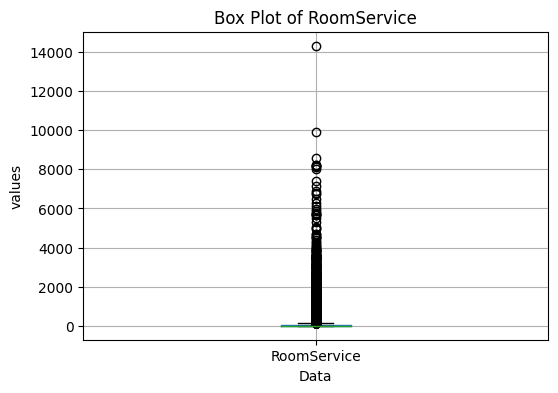

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


FoodCourt :: 
q1 :0.0
q3 :76.0
upper_bound :
190.0
lower_bound :
-114.0

number of outliers = 1823 , Outliers : [3576.0, 1283.0, 483.0, 1539.0, 785.0, 7295.0, 974.0, 225.0, 6073.0, 850.0, 964.0, 492.0, 195.0, 605.0, 1096.0, 592.0, 258.0, 2165.0, 8397.0, 5840.0, 697.0, 1208.0, 856.0, 2811.0, 427.0, 410.0, 331.0, 11418.0, 2537.0, 2223.0, 2344.0, 597.0, 334.0, 418.0, 420.0, 1688.0, 985.0, 10346.0, 219.0, 972.0, 2433.0, 1720.0, 281.0, 888.0, 1249.0, 3571.0, 695.0, 615.0, 4810.0, 231.0, 2390.0, 918.0, 654.0, 1281.0, 587.0, 4458.0, 6500.0, 422.0, 584.0, 230.0, 540.0, 2628.0, 4651.0, 317.0, 349.0, 2876.0, 1198.0, 212.0, 1068.0, 215.0, 235.0, 2491.0, 773.0, 747.0, 5728.0, 11003.0, 608.0, 420.0, 896.0, 465.0, 7255.0, 1170.0, 3584.0, 4118.0

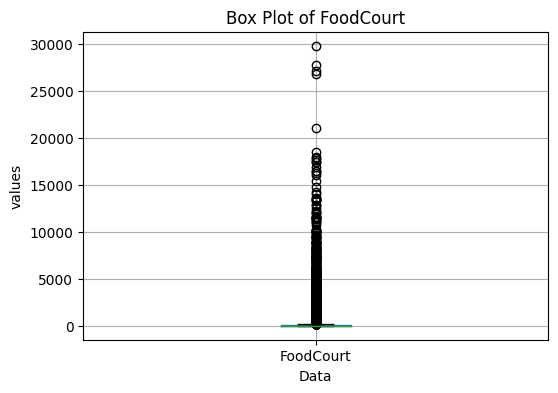

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


ShoppingMall :: 
q1 :0.0
q3 :27.0
upper_bound :
67.5
lower_bound :
-40.5

number of outliers = 1829 , Outliers : [371.0, 151.0, 589.0, 1123.0, 876.0, 69.0, 136.0, 81.0, 1411.0, 1750.0, 180.0, 1938.0, 3374.0, 148.0, 197.0, 446.0, 738.0, 1018.0, 1295.0, 670.0, 957.0, 526.0, 570.0, 326.0, 87.0, 804.0, 429.0, 296.0, 730.0, 126.0, 97.0, 210.0, 161.0, 673.0, 426.0, 401.0, 867.0, 719.0, 137.0, 307.0, 119.0, 188.0, 301.0, 221.0, 665.0, 256.0, 691.0, 796.0, 287.0, 541.0, 408.0, 313.0, 592.0, 128.0, 2078.0, 88.0, 1324.0, 259.0, 1359.0, 157.0, 74.0, 209.0, 784.0, 251.0, 211.0, 634.0, 1434.0, 202.0, 1865.0, 2975.0, 453.0, 4447.0, 592.0, 558.0, 786.0, 591.0, 881.0, 356.0, 552.0, 1116.0, 101.0, 5952.0, 7185.0, 840.0, 102.0, 136.0, 795.0, 188.0,

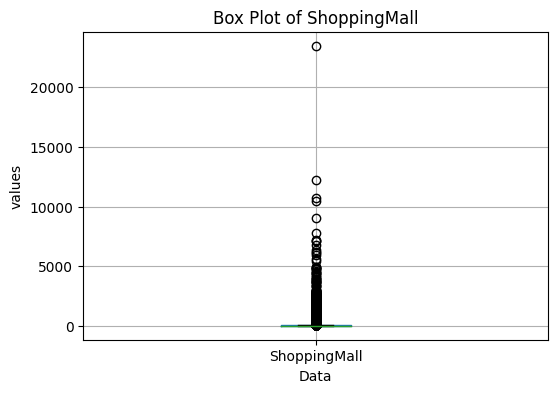

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Spa :: 
q1 :0.0
q3 :59.0
upper_bound :
147.5
lower_bound :
-88.5

number of outliers = 1788 , Outliers : [549.0, 6715.0, 3329.0, 565.0, 291.0, 216.0, 998.0, 1438.0, 437.0, 990.0, 951.0, 2606.0, 2511.0, 1379.0, 4683.0, 286.0, 1377.0, 253.0, 321.0, 638.0, 188.0, 830.0, 3929.0, 1868.0, 238.0, 699.0, 316.0, 564.0, 221.0, 14970.0, 299.0, 202.0, 898.0, 1072.0, 795.0, 878.0, 1125.0, 182.0, 234.0, 1634.0, 713.0, 1720.0, 1438.0, 4812.0, 283.0, 584.0, 8620.0, 299.0, 981.0, 754.0, 888.0, 162.0, 1157.0, 1090.0, 1851.0, 4476.0, 318.0, 170.0, 148.0, 1476.0, 274.0, 280.0, 685.0, 177.0, 441.0, 2766.0, 176.0, 5132.0, 2579.0, 1173.0, 3693.0, 1508.0, 8157.0, 3835.0, 6011.0, 310.0, 567.0, 1537.0, 352.0, 5467.0, 562.0, 715.0, 2962.0, 622.0, 467.0, 193

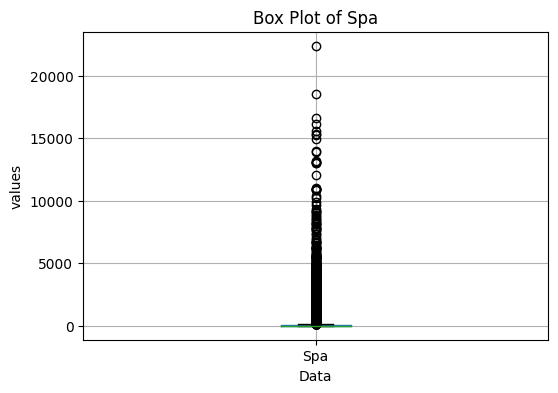

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


VRDeck :: 
q1 :0.0
q3 :46.0
upper_bound :
115.0
lower_bound :
-69.0

number of outliers = 1809 , Outliers : [193.0, 124.0, 637.0, 679.0, 328.0, 453.0, 1229.0, 401.0, 855.0, 127.0, 460.0, 726.0, 1063.0, 506.0, 9654.0, 513.0, 637.0, 131.0, 764.0, 1687.0, 445.0, 404.0, 6898.0, 207.0, 462.0, 607.0, 135.0, 137.0, 567.0, 175.0, 2111.0, 119.0, 232.0, 956.0, 575.0, 443.0, 705.0, 122.0, 739.0, 387.0, 146.0, 1918.0, 1099.0, 1023.0, 319.0, 1116.0, 10912.0, 1063.0, 2054.0, 803.0, 1240.0, 333.0, 1460.0, 828.0, 262.0, 1370.0, 5166.0, 2469.0, 241.0, 1330.0, 202.0, 1260.0, 552.0, 1057.0, 907.0, 572.0, 417.0, 1023.0, 230.0, 8188.0, 697.0, 2175.0, 1059.0, 164.0, 368.0, 140.0, 128.0, 987.0, 5688.0, 1699.0, 223.0, 1241.0, 792.0, 3139.0, 225.0, 3656.0

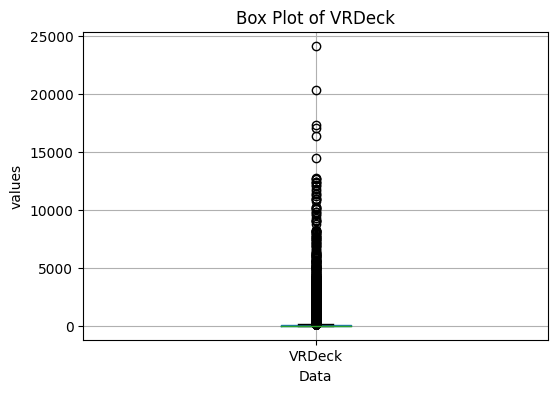

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________




In [1054]:
null_cols_with_no_outlires , null_cols_with_outlires =  calc_visualize_outliers (train_data , Numerical_Features_with_null)

In [1055]:
null_cols_with_no_outlires , null_cols_with_outlires

([], ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

In [1056]:
# Replace missing values in "RoomService" column with 0 for passengers under 20 years old
train_data.loc[train_data["Age"] < 20, "RoomService"] = train_data.loc[train_data["Age"] < 20, "RoomService"].fillna(0)

# Replace missing values in "FoodCourt" column with 0 for passengers under 20 years old
train_data.loc[train_data["Age"] < 20, "FoodCourt"] = train_data.loc[train_data["Age"] < 20, "FoodCourt"].fillna(0)

# Replace missing values in "ShoppingMall" column with 0 for passengers under 20 years old
train_data.loc[train_data["Age"] < 20, "ShoppingMall"] = train_data.loc[train_data["Age"] < 20, "ShoppingMall"].fillna(0)

# Replace missing values in "Spa" column with 0 for passengers under 20 years old
train_data.loc[train_data["Age"] < 20, "Spa"] = train_data.loc[train_data["Age"] < 20, "Spa"].fillna(0)


# Replace missing values in "VRDeck" column with 0 for passengers under 20 years old
train_data.loc[train_data["Age"] < 20, "VRDeck"] = train_data.loc[train_data["Age"] < 20, "VRDeck"].fillna(0)




#*********************************************************************************************************************************
# Replace missing values in "RoomService" column with 0 for passengers under 20 years old
test_data.loc[test_data["Age"] < 20, "RoomService"] = test_data.loc[test_data["Age"] < 20, "RoomService"].fillna(0)

# Replace missing values in "FoodCourt" column with 0 for passengers under 20 years old
test_data.loc[test_data["Age"] < 20, "FoodCourt"] = test_data.loc[test_data["Age"] < 20, "FoodCourt"].fillna(0)

# Replace missing values in "ShoppingMall" column with 0 for passengers under 20 years old
test_data.loc[test_data["Age"] < 20, "ShoppingMall"] = test_data.loc[test_data["Age"] < 20, "ShoppingMall"].fillna(0)

# Replace missing values in "Spa" column with 0 for passengers under 20 years old
test_data.loc[test_data["Age"] < 20, "Spa"] = test_data.loc[test_data["Age"] < 20, "Spa"].fillna(0)


# Replace missing values in "VRDeck" column with 0 for passengers under 20 years old
test_data.loc[test_data["Age"] < 20, "VRDeck"] = test_data.loc[test_data["Age"] < 20, "VRDeck"].fillna(0)




In [1057]:
for i in Numerical_Features_with_null :
  mid = train_data[i].mean()
  train_data[i].fillna(mid, inplace=True)

for i in Numerical_Features_with_null :
  mid = test_data[i].mean()
  test_data[i].fillna(mid, inplace=True)

**2. Categorical Features**

In [1058]:
categorical_Feature_with_null

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [1059]:
for i in categorical_Feature_with_null :
  mode = train_data[i].mode()[0]
  train_data[i].fillna(mode, inplace=True)

for i in categorical_Feature_with_null :
  mode = test_data[i].mode()[0]
  test_data[i].fillna(mode, inplace=True)

In [1060]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [1061]:
test_data.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age             91
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64

# **Feature Extracting**



---



---



---



---



---



---



---



# **from Passenger Id**
1. **Group name**	                                              


1.PassengerId - A unique Id for each passenger.     


---


 Each Id takes the form **gggg_pp**                                            
**gggg** indicates a **group the passenger** is travelling with              
**pp** is their **number within the group**.

In [1062]:
def grop_number (id):
  group = id.split('_')[0]
  return group
# grop_number(train_data['PassengerId'])
train_data["Groupname"] = train_data["PassengerId"].apply(grop_number)
test_data["Groupname"]   = test_data["PassengerId"].apply(grop_number)

In [1063]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013


In [1064]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001


In [1065]:
train_data["Groupname"].dtypes

dtype('O')

In [1066]:
train_data["Groupname"] = train_data["Groupname"].astype("int64")
test_data["Groupname"] = test_data["Groupname"].astype("int64")


In [1067]:
test_data["Groupname"].dtypes

dtype('int64')

# **from cabin**
1.**Cabin Deck**                                               
2.**Cabin Num**                                          
3.**Cabin Side**

 cabin number where the passenger is staying.                      
Takes the form **deck/num/side**,                     
**side** can be either **P for Port or S for Starboard**.           

In [1068]:
# for val in train_data["Cabin"]:
#   # if isinstance(val, float):
#   #   print(val)
#   if   pd.isnull(val):
#     print(val)


In [1069]:
def CabinDeck ( cabin):
  if (not pd.isnull(cabin)) :
    return cabin.split('/')[0]
  else :
    return None

train_data["CabinDeck"] = train_data["Cabin"].apply(CabinDeck)
test_data["CabinDeck"] = test_data["Cabin"].apply(CabinDeck)

In [1070]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B


In [1071]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G


In [1072]:
#B/0/P
def CabinNum ( cabin):
  if (not pd.isnull(cabin)) :
    return cabin.split('/')[1].split('/')[0]
  else :
    return None

train_data["CabinNum"] = train_data["Cabin"].apply(CabinNum)
test_data["CabinNum"] = test_data["Cabin"].apply(CabinNum)

In [1073]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0


In [1074]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G,3


In [1075]:
#B/0/P
def CabinSide ( cabin):
  if (not pd.isnull(cabin)) :
    return cabin.split('/')[2]
  else :
    return None

train_data["CabinSide"] = train_data["Cabin"].apply(CabinSide)
test_data["CabinSide"] = test_data["Cabin"].apply(CabinSide)

In [1076]:
'''
n = "B/0/P"
s = n.split("/")
s  #['B', '0', 'P']
  #s[0], s[1] ,s[2]
'''
'''
n = "B/0=P"
s = n.split("/")
s     #['B', '0=P']
      #s[0],s[1]
'''
'''
n = "B/0=P"
s = n.split("/")[1].split("=")
s  #['0', 'P']
'''


'\nn = "B/0=P"\ns = n.split("/")[1].split("=")\ns  #[\'0\', \'P\']\n'

In [1077]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0,P


In [1078]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G,3,S


# **from Age**
**Age Group -- > "Child", "Teenager", "Adult", "Senior"**

In [1079]:
# train_data["Age"].describe()

In [1080]:
# t =train_data[(train_data["Age"]<13) & (train_data["RoomService"] != "False")][["Age","VIP"]]
# t.head()


In [1081]:
# train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
# test_data["Age"].fillna(test_data["Age"].median(), inplace=True)

In [1082]:
def AgeGroup (age) :
  if (not pd.isnull(age)) :
    if (age <= 5):
      return "Baby"
    elif (age <= 12):
      return "Child"
    elif age <= 18 :
      return "Teen"
    elif age <= 50 :
      return "Adult"
    else :
      return "Elderly"
  else :
    return "Baby"

train_data ["AgeGroup"] = train_data["Age"].apply(AgeGroup)
test_data ["AgeGroup"] = test_data["Age"].apply(AgeGroup)

In [1083]:
train_data["Age"].fillna("Baby", inplace=True)
test_data["Age"].fillna("Baby", inplace=True)

In [1084]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G,3,S,Adult


In [1085]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0,P,Adult


In [1086]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Groupname       0
CabinDeck       0
CabinNum        0
CabinSide       0
AgeGroup        0
dtype: int64

In [1087]:
train_data = train_data.drop(columns=[ "Cabin" ,"PassengerId","Age" ])
test_data  = test_data.drop(columns=["Cabin" , "PassengerId" , "Age"])

# **From (RoomService, FoodCourt, ShoppingMall, Spa, VRDec)**
total cost

In [1088]:
train_data['TotalCosts'] = train_data['RoomService']  + train_data['FoodCourt']  + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']
test_data['TotalCosts'] = test_data['RoomService']  + test_data['FoodCourt']  + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']


# **label encoding**

In [1089]:
train_data.head(1)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0,P,Adult,0.0


In [1090]:
# train_data = train_data.replace({"HomePlanet" : {"Earth" : 1 , "Europa" :2 , "Mars" : 3} ,
#                                   "CryoSleep" : {False : 0 ,True :1 } ,
#                                  "Destination" : {'TRAPPIST-1e' : 1 ,'55 Cancri e' : 2 ,'PSO J318.5-22' : 3},
#                                  "VIP" :       {False : 0 ,True :1 } ,
#                                  "Transported" : {False : 0 ,True :1 } ,
#                                  //"AgeGroup" : {"Child" : 1 , "Teenager" :2 , "Adult" : 3 , "Senior" : 4},
#                                  "CabinDeck" : {"A" : 1 , "B" :2 , "C" : 3 , "D" : 4 , "E" : 5 , "F" : 6 , "G" : 7 , "T" : 8},
#                                  "CabinSide"  : {"S" : 1 , "P" :2 }
#                      })

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_data['HomePlanet']= label_encoder.fit_transform(train_data['HomePlanet'])
train_data['Destination']= label_encoder.fit_transform(train_data['Destination'])
train_data['CryoSleep']= label_encoder.fit_transform(train_data['CryoSleep'])
train_data['Transported']= label_encoder.fit_transform(train_data['Transported'])
train_data['VIP']= label_encoder.fit_transform(train_data['VIP'])
train_data['CabinDeck']= label_encoder.fit_transform(train_data['CabinDeck'])
train_data['AgeGroup']= label_encoder.fit_transform(train_data['AgeGroup'])
train_data['CabinSide']= label_encoder.fit_transform(train_data['CabinSide'])

In [1091]:
# test_data = test_data.replace({"HomePlanet" : {"Earth" : 1 , "Europa" :2 , "Mars" : 3} ,
#                                   "CryoSleep" : {False : 0 ,True :1 } ,
#                                  "Destination" : {'TRAPPIST-1e' : 1 ,'55 Cancri e' : 2 ,'PSO J318.5-22' : 3},
#                                  "VIP" :       {False : 0 ,True :1 } ,
#                                  "AgeGroup" : {"Child" : 1 , "Teenager" :2 , "Adult" : 3 , "Senior" : 4},
#                                  "CabinDeck" : {"A" : 1 , "B" :2 , "C" : 3 , "D" : 4 , "E" : 5 , "F" : 6 , "G" : 7 , "T" : 8},
#                                  "CabinSide"  : {"S" : 1 , "P" :2 }
#                      })


# Encode labels in column 'species'.
test_data['HomePlanet']= label_encoder.fit_transform(test_data['HomePlanet'])
test_data['Destination']= label_encoder.fit_transform(test_data['Destination'])
test_data['CryoSleep']= label_encoder.fit_transform(test_data['CryoSleep'])
test_data['VIP']= label_encoder.fit_transform(test_data['VIP'])
test_data['CabinDeck']= label_encoder.fit_transform(test_data['CabinDeck'])
test_data['AgeGroup']= label_encoder.fit_transform(test_data['AgeGroup'])
test_data['CabinSide']= label_encoder.fit_transform(test_data['CabinSide'])

In [1092]:
train_data.head(2)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0.0
1,0,0,2,0,109.0,9.0,25.0,549.0,44.0,1,2,5,0,1,0,736.0


In [1093]:
test_data.head(2)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,0,1,2,0,0.0,0.0,0.0,0.0,0.0,13,6,3,1,0,0.0
1,0,0,2,0,0.0,9.0,0.0,2823.0,0.0,18,5,4,1,0,2832.0


# **Split features and target**

In [1094]:
train_data.head(1)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0.0


In [1095]:
target = train_data["Transported"]

train_data = train_data.drop("Transported", axis=1)


In [1096]:
test_data.head(1)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,0,1,2,0,0.0,0.0,0.0,0.0,0.0,13,6,3,1,0,0.0


In [1097]:
train_data.head(1)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0.0


In [1098]:
target

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

# **train_test_split**

In [1099]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
# print(x_train.shape )
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [1100]:
# train_data.head(2)

In [1101]:
# test.head(2)

# **Normalization**

In [1102]:
train_data_col = train_data.columns
test_data_col  = test_data.columns
#-----------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------


# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()


# train_data = scaler.fit_transform(train_data)
# test_data  = scaler.transform(test_data)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on the training data and transform both training and testing data
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)



#-----------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------

train_data = pd.DataFrame (train_data , columns=[train_data_col])
test_data  = pd.DataFrame (test_data , columns=[test_data_col])

In [1103]:
train_data

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,0.5,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.0,0.00,0.000000
1,0.0,0.0,1.0,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.000108,0.714286,0.000000,1.0,0.00,0.020452
2,0.5,0.0,1.0,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.000216,0.000000,0.000000,1.0,0.75,0.288521
3,0.5,0.0,1.0,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.000216,0.000000,0.000000,1.0,0.00,0.143830
4,0.0,0.0,1.0,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.000323,0.714286,0.000528,1.0,1.00,0.030317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.5,0.0,0.0,1.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.999569,0.000000,0.051742,0.0,0.00,0.237197
8689,0.0,1.0,0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.999784,0.857143,0.791447,1.0,1.00,0.000000
8690,0.0,0.0,1.0,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,0.999892,0.857143,0.791975,1.0,0.00,0.052047
8691,0.5,0.0,0.0,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,1.000000,0.571429,0.321014,1.0,0.00,0.128852


In [1104]:
test_data.head(3)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.001293,0.857143,0.001584,1.0,0.0,0.000000
1,0.0,0.0,1.0,0.0,0.0,0.000302,0.0,0.125982,0.0,0.001832,0.714286,0.002112,1.0,0.0,0.078695
2,0.5,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.001940,0.285714,0.000000,1.0,0.0,0.000000


In [1105]:
train_data.head(3)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,0.5,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.142857,0.0,0.0,0.00,0.000000
1,0.0,0.0,1.0,0.0,0.007608,0.000302,0.001064,0.02450,0.001823,0.000108,0.714286,0.0,1.0,0.00,0.020452
2,0.5,0.0,1.0,1.0,0.003001,0.119948,0.000000,0.29967,0.002030,0.000216,0.000000,0.0,1.0,0.75,0.288521


# **ML Models**

In [1106]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

In [1107]:
train_data.head(3)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,0.5,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.142857,0.0,0.0,0.00,0.000000
1,0.0,0.0,1.0,0.0,0.007608,0.000302,0.001064,0.02450,0.001823,0.000108,0.714286,0.0,1.0,0.00,0.020452
2,0.5,0.0,1.0,1.0,0.003001,0.119948,0.000000,0.29967,0.002030,0.000216,0.000000,0.0,1.0,0.75,0.288521


**LogisticRegression**

In [1108]:
#----------------------------------------------------
#Applying LogisticRegression Model

'''
linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0)
LogisticRegressionModel.fit(train_data, target)

LogisticRegression(solver='sag')

In [1109]:
# Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(train_data, target))
# print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))
# print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
# print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = LogisticRegressionModel.predict(train_data)
accuracy = accuracy_score(target, y_pred)
print("Accuracy:", accuracy)

LogisticRegressionModel Train Score is :  0.7644081444840677
Accuracy: 0.7644081444840677


**GradientBoostingClassifier**

In [1110]:
#----------------------------------------------------
#Applying GradientBoostingClassifier Model

'''
ensemble.GradientBoostingClassifier(loss='deviance’, learning_rate=0.1,n_estimators=100, subsample=1.0,
                                    criterion='friedman_mse’,min_samples_split=2,min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,max_depth=3,min_impurity_decrease=0.0,
                                    min_impurity_split=None,init=None, random_state=None,max_features=None,
                                    verbose=0, max_leaf_nodes=None,warm_start=False, presort='auto’,
                                    validation_fraction=0.1,n_iter_no_change=None, tol=0.0001)
'''

GBCModel = GradientBoostingClassifier ( n_estimators = 150  , learning_rate=0.03 , max_depth = 5 )
GBCModel.fit(train_data, target)




GradientBoostingClassifier(learning_rate=0.03, max_depth=5, n_estimators=150)

In [1111]:
#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(train_data, target))
# print('GBCModel Test Score is : ' , GBCModel.score(x_test, y_test))
# print('GBCModel features importances are : ' , GBCModel.feature_importances_)
#print('----------------------------------------------------')

#Calculating Prediction
# y_pred = GBCModel.predict(x_test)

GBCModel Train Score is :  0.8397561256183136


In [1112]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 150, 120],  # Number of trees in the forest
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5 , 6]  # Maximum depth of the tree
}

#
# Instantiate GridSearchCV
grid_search = GridSearchCV(GBCModel, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit (train_data , target)



GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.03,
                                                  max_depth=5,
                                                  n_estimators=150),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 150, 120]},
             scoring='accuracy')

In [1114]:
# Print the best parameters and best score
best_estimator = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.722314187948446


In [1115]:
PassengerId_test

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [1116]:
myPredictions =  best_estimator.predict(test_data)

In [1117]:
myPredictions

array([1, 0, 1, ..., 1, 1, 1])

In [1118]:
len(myPredictions)

4277

In [1119]:
myPredictions = myPredictions.astype(bool)
myPredictions

array([ True, False,  True, ...,  True,  True,  True])

In [1120]:
len(myPredictions)

4277

In [1121]:
# test = test.drop("Transported" , axis  =1)

In [1122]:
subm = pd.DataFrame(PassengerId_test)
subm

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [1123]:
subm["Transported"] = myPredictions


In [1124]:
subm

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [1125]:
subm.to_csv("subm.csv" , index = None)

In [1126]:
v= pd.read_csv("/content/subm.csv")
v

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


**RandomForestClassifier**

In [603]:
#----------------------------------------------------

#----------------------------------------------------
#Applying RandomForestClassifier Model

'''
ensemble.RandomForestClassifier(n_estimators='warn’, criterion=’gini’, max_depth=None,
                                min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                max_features='auto’,max_leaf_nodes=None,min_impurity_decrease=0.0,
                                min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                random_state=None, verbose=0,warm_start=False, class_weight=None)
'''

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=150,max_depth=10 ) #criterion can be also : entropy
RandomForestClassifierModel.fit(train_data, target)


RandomForestClassifier(max_depth=10, n_estimators=150)

In [604]:
#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(train_data, target))
# print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
#print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(train_data)
# y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
# print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.8654089497296675


In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [80 , 100, 125 ,150 , 200 ],
    'max_depth': [10, 15 , 18, 20 ],
    'min_samples_split': [2, 3, 4 , 5],
    'min_samples_leaf': [1, 2,3, 4],
    "criterion" :  ['gini','entropy','log_loss']
    # 'random_state' : [33]
}


# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=RandomForestClassifierModel, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(train, target)



Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=200,
                                              random_state=33),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [80, 100, 125, 150, 200]},
             verbose=2)

In [ ]:

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)



best_model = grid_search.best_estimator_
y_pred = best_model.predict(train)

# Evaluate the performance of the model on the test data (if needed)
# For classification:
accuracy = accuracy_score(target, y_pred)
print("Accuracy on test data:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 125}
Best Score: 0.7689006882650837
Accuracy on test data: 0.9126883699528356


In [605]:
my_prediction =  RandomForestClassifierModel.predict(test_data)

In [606]:
len(my_prediction)

4277

In [607]:
my_prediction = my_prediction.astype(bool)

In [608]:
len(my_prediction)

4277

In [609]:
submissionr =PassengerId_test


In [610]:
submissionr["Transported"] = my_prediction


In [611]:
submissionr

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [612]:
submissionr.to_csv("submissionr.csv" , index = None)

In [613]:
v= pd.read_csv("/content/submissionr.csv")
v

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
#----------------------------------------------------

#----------------------------------------------------
#Applying DecisionTreeClassifier Model

'''
sklearn.tree.DecisionTreeClassifier(criterion='gini’, splitter=’best’, max_depth=None,min_samples_split=2,
                                    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
                                    random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                    min_impurity_split=None, class_weight=None,presort=False)
'''

DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=9,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)



DecisionTreeClassifier(max_depth=9, random_state=33)

In [ ]:
#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))
#print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
#print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
#print('----------------------------------------------------')

#Calculating Prediction
# y_pred = DecisionTreeClassifierModel.predict(x_test)
# y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
#print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.8278038755137992
DecisionTreeClassifierModel Test Score is :  0.7827363476218439


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [9 , 10, 9, 12],
    'random_state': [33]
}
grid_search = GridSearchCV ( estimator = DecisionTreeClassifierModel , param_grid=param_grid , cv=5 , scoring='accuracy' )

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=9, random_state=33),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 10, 9, 12], 'random_state': [33]},
             scoring='accuracy')

In [ ]:


# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the performance of the model on the test data (if needed)
# For classification:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'random_state': 33}
Best Score: 0.7679122993569295
Accuracy on test data: 0.7698179682912507


In [ ]:
#Import Libraries
from sklearn.neural_network import MLPClassifier
#----------------------------------------------------

#----------------------------------------------------
#Applying MLPClassifier Model

'''
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
                                     alpha=0.0001,batch_size='auto’, learning_rate=’constant’,momentum=0.9,
                                     learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
                                     random_state=None, tol=0.0001, verbose=False, warm_start=False,
                                     n_iter_no_change=10, nesterovs_momentum=True,early_stopping=False,
                                     validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,)
'''

MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 3), random_state=33,
              solver='lbfgs')

In [ ]:

#Calculating Details
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(x_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(x_test, y_test))



MLPClassifierModel Train Score is :  0.8490898414562537
MLPClassifierModel Test Score is :  0.8085731062830299


In [ ]:
my_prediction =

In [ ]:
submission = test_data[["PassengerId"]]
# submission["Transported"] = my_predictions
submission.csv("submission.csv" , index = None)

In [ ]:
# submission["Transported"] = my_predictions

In [ ]:
sample_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [ ]:
submission.csv("submission.csv" , index = None)